# Assignment _Logistic_Regression.

## Problem Statement 
 * To Detect Credit card fraud by given feature.

In [1]:
## First we Importing Liabraries.
import pandas as pd
import numpy as np  
import warnings

import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline 

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()  ## By default it gives first 5 row's.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### What is in our Dataset 
* In our Dataset there is 31 Columns and 284807 Rows so our Target variable is Final column "Class" which is Discret in 
Nature which will have value '0' and '1' . 
So '0' shows here is "Not Fraud" or '1' Shows "Fraud" .

In [4]:
''' shape function, which helps us to find the shape or size of an array or matrix. 
    The function "shape" returns the shape of an array. The shape is a tuple of integers.
    '''
data.shape

(284807, 31)

In [5]:
print("Shape of the data", data.shape)

Shape of the data (284807, 31)


In [6]:
print("Information about data:- ") 
data.info()

Information about data:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

In [7]:
''' The describe() method is used for calculating some statistical data
     like percentile, mean and std of the numerical values of the Series or DataFrame. 
     '''
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.isnull() ## if null value present in the data then it gives "True" otherwise "False".

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
''' isnull(). sum(). sum() returns the number of missing values in the data set. 
    A simple way to deal with data containing missing values is to skip rows with missing values in the dataset.
    '''
data.isnull().sum().sum()

0

### Note :-
 * In our Data there is no Nan Values, Null Values or Missing Values 

In [11]:
''' In our Data there is no Nan Values, Null Values or Missing Values '''

' In our Data there is no Nan Values, Null Values or Missing Values '

### Exploratory data analysis

Total No. Of NOT_FRAUD :-  284315
Total No. Of FRAUD :-  492


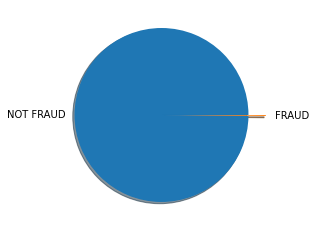

In [12]:
# seeing the distribution of classes, this will help us to identify which types 

len_Not_Fraud = len(data["Class"][data.Class == 0])
len_Fraud = len(data["Class"][data.Class == 1])

arr = np.array([len_Not_Fraud , len_Fraud]) 
labels = ['NOT FRAUD', 'FRAUD'] 
print("Total No. Of NOT_FRAUD :- ", len_Not_Fraud)
print("Total No. Of FRAUD :- ", len_Fraud)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 

# inference :- we are actually working on imbalance data  
# imbalance:- your data is not equally distributed between classes 

In [13]:
''' In Above Pie chart Shows That Our Dataset is Very Very Inbalance '''

' In Above Pie chart Shows That Our Dataset is Very Very Inbalance '

In [14]:
data["Class"]

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### Solution :-
### Undersampling :-
     * Undersampling is teachnique where you reduce the number of sample in your Majority Class that the Match of 
     the Total Length of your Minority Class Sample.

In [15]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [16]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [17]:
target = 'Class'  ## This is our Target Variable which is Discrite in Nature.
 ## 0 is Not_Fraud or 1 is Fraud.
 ## Or i Assign the Variable called as target.   

In [18]:
X = data.loc[:, data.columns!=target]
## why i use this Suppose the column names whatever it is so i want to a perticular col or row then 
## i use the "iloc" and when i want to a perticular col name ABCDE which is i know or i give or same 
## row then i use "loc"

In [19]:
Y = data.loc[:, data.columns==target]

### Spliting our Dataset 

In [20]:
## For that we Firt import the Liabraries 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split 

### Why we use this ?
* Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist
* So Here our target variable is Binary and It's Depend on other 30 Varibles.

### Precision
* Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.
### Recall
*  Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive)

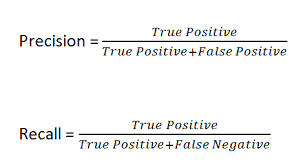

### F1 Score
* F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

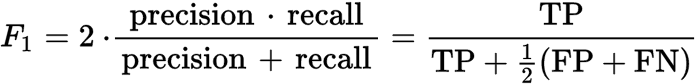

### Accuracy 
* Accuracy is Number of correct predictions Total number of predictions. For binary classification, accuracy can also be calculated in terms of positives and negatives

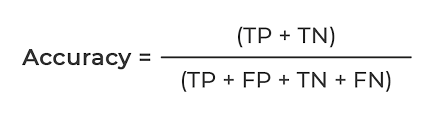

In [21]:
data.shape

(284807, 31)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 42)
## In Traing 67 % and testing 33 %
## The random_state parameter is used for initializing the internal random number generator, which will decide the 
## splitting of data into train and test indices in your case. 
## If random_state is None or np. random, then a randomly-initialized RandomState object is returned.

0    284315
1       492
Name: Class, dtype: int64


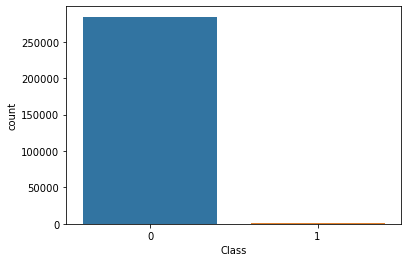

In [23]:
## Lets look Class Distribution
ax = sns.countplot(x = target, data = data)
print(data[target].value_counts())

In [24]:
## As a Evidance from the plot class '0' means not fraud is 284315 rows and Class '1' means fraud is 492
## Let's try to figure out the percentage countribution of each Class.
## data.shape[0] Gives you Length of First Row and data.shape[1] gives you length of first column.
100 * (492/float(data.shape[0])) 

0.1727485630620034

In [25]:
100 * (284315/float(data.shape[0]))

99.82725143693798

In [26]:
## it shows class '1' has total of less than 1 % of the samples  
## it shows class '0' has almost 99.82 % of the total number samples  
## So whatever you model build is biased to the class '0'  

In [27]:
Y_train[target].value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
target

'Class'

In [30]:
Y_train

,Class
134955,0
84470,0
176085,0
79348,0
63554,0
...,...
119879,0
259178,0
131932,0
146867,0


In [31]:
## clf varible as a Classifier .
clf=LogisticRegression().fit(X_train, Y_train)

C:\Users\sanket\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sanket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
134955,81047.0,1.146174,-0.083967,0.602963,0.725410,-0.396283,0.186275,-0.318544,0.185287,0.362387,...,-0.155253,-0.012052,0.219314,-0.068172,0.077802,0.482796,0.451360,-0.002776,-0.003524,2.97
84470,60323.0,-0.918050,0.578744,1.168159,-0.862173,0.969264,0.483973,0.953430,0.188512,-0.866718,...,0.104206,0.102956,0.073220,-0.324398,-1.129387,0.622502,0.395548,-0.042526,0.032731,72.73
176085,122620.0,-2.013096,-3.261460,-1.443935,0.149307,2.734412,-1.572646,0.380914,-0.058952,0.668700,...,1.377841,0.398680,0.005726,1.652294,0.136111,-1.705085,-0.522617,-0.031407,0.243772,387.80
79348,57979.0,-0.767334,0.383415,0.210914,0.035407,0.059217,1.220341,-0.053366,0.718190,-1.945750,...,-0.064315,-0.145465,-0.121835,-0.023886,-1.764699,-0.060345,-0.080600,0.292808,0.112469,105.54
63554,50771.0,-0.817828,1.621705,0.911472,1.305673,-0.402086,1.031816,-1.972642,-5.092458,-1.570995,...,1.300047,-2.932584,-0.519522,0.194226,0.138621,0.768231,-0.580148,0.027377,0.213998,28.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


In [33]:
Y_Test_Pred = clf.predict(X_test)

In [34]:
pd.crosstab(pd.Series(Y_Test_Pred, name = 'Predicted'), 
            pd.Series(Y_test[target], name = 'Actual'))

Actual,0,1
Predicted,,
0,30736,63
1,50,0


In [35]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9989041037590305
Precision =  0.6666666666666666
Recall =  0.6174496644295302
F1 Score =  0.6411149825783973


   * So my model is performing very well with an accuracy around 99.89 %
    * But you see carefully precision is 66.66 % and Recall is 61.74 %
    * The Harmonic Mean of both precision and Recall gives the F1 score is 0.55

In [36]:
## So i wanted to my F1 score is very high but that is not case  as you see the model was very bias towards to '0' sample

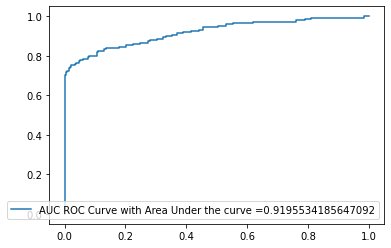

In [37]:
generate_auc_roc_curve(clf, X_test)

In [38]:
''' I find that overall 0.84 value is very high but i still want to keep on increasing so that i kind of deal with
 class inbalance data have in hand .
 '''

' I find that overall 0.84 value is very high but i still want to keep on increasing so that i kind of deal with\n class inbalance data have in hand .\n '

In [55]:
Y_train[target].value_counts()

0    331
1    328
Name: Class, dtype: int64

### UNDERSAMPLING

In [39]:
## So as you know the minority class is '1' 
## so i find out length of the total no of in class '1' 
minority_class_len = len(data[data[target]== 1])
print(minority_class_len)

492


In [40]:
majority_class_indices= data[data[target]== 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [41]:
## The aim of Undersampling is to reduce the no of samples in your majority class that the match of the total no of 
## samples in minority class

In [42]:
## i select the indices of the majority class and total no.of sample minority class len and i don't want any kind 
## of replacement to comein .ie. replace= False.
random_majority_indices = np.random.choice(majority_class_indices,minority_class_len, replace = False)
print(len(random_majority_indices))

492


In [43]:
minority_class_indices = data[data[target] == 1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [44]:
## Concatenate both of them .
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])
## new variable under_sample_indices

In [45]:
## Using this samples i filter out the data frame and save it into new data set call under_sample 
under_sample = data.loc[under_sample_indices]

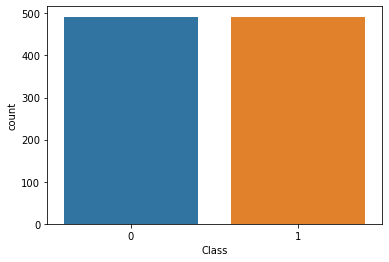

In [46]:
## Frequincy plot of the classes both will have same no. of classe which is 492
sns.countplot(x=target, data=under_sample)

In [47]:
## So We again split the Test and Train and X and Y X_train X_test and Y_train and Y_test.
X = under_sample.loc[:, data.columns!=target]
Y = under_sample.loc[:, data.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

C:\Users\sanket\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9230769230769231
Precision =  0.9664429530201343
Recall =  0.8780487804878049
F1 Score =  0.9201277955271566


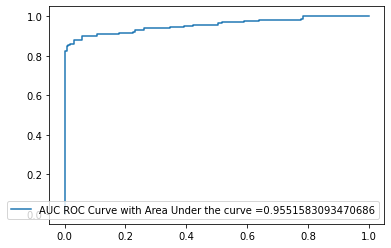

In [49]:
generate_auc_roc_curve(clf, X_test)

In [50]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter = 1000) 
lr_clf.fit(X_train, Y_train) 

lr_clf_pred = lr_clf.predict(X_test) 

C:\Users\sanket\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
lr_clf_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [52]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:- \n", confusion_matrix(Y_test, Y_Test_Pred))

Confusion Matrix:- 
 [[156   5]
 [ 20 144]]


# Conclusion :-
* As you can Clearly see the accuracy is claearly gone down which is the testing accuracy.
* But the overall the precision, Recall and F1 score as gone up above 0.9 which was not case intially .
* So intially you can see the precision is very poor 0.66 value Recall 0.61 and F1 score is 0.64 
* After modifying this my accuracy is gone down but other factore is gone up even my Auc-Roc Curve value which in previous case is 0.84 as now increase to 0.91 
* That is the overall effect of undersampling .

## SMOTE 
* SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.


In [53]:
### Smote for Oversampling 
### For that Frist Importing Liabraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [54]:

unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 331, 1: 328}